In [117]:
import re
import nltk
import numpy as np
from gensim.models import Word2Vec
from multiprocessing import Pool
from scipy import spatial
import xml.etree.ElementTree as ET
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
def readtags(doc):
    tree = ET.parse(doc)
    root = tree.getroot()
    name = doc.replace('.xml','')
    name = []
    for description in root.iter('seg'):
        p = description.text
        try:
            p=p.replace('\t','')
            p=p.replace('\n','')
            p = p.replace('.','')
            p = re.sub("\s\s+" , " ", p)
        except:
            pass
        name.append(p)
    return name

In [3]:
f = open('languages/Tamil.txt', 'r+', encoding="utf8")
tamil = f.readlines()
tamil = tamil[:31102]
tamil[0]= tamil[0].strip('\ufeffMMA')
import string
etamilclude = set(string.punctuation)
for i in range(0,len(tamil)):
    tamil[i] = tamil[i].strip('\n')
    tamil[i] = ''.join(ch for ch in tamil[i] if ch not in etamilclude)
chinese = readtags('Languages/Chinese.xml')
greek = readtags('Languages/Greek.xml')
sanskrit  = readtags('Languages/Hindi.xml')
latin = readtags('Languages/Latin.xml')
hebrew = readtags('Languages/Hebrew.xml')
arabic = readtags('Languages/Arabic.xml')

### Tokenizing every language corresponding to its writing system

In [32]:
tamil[1001].split(' ')

['இதேபோல்',
 'ஆறு',
 'ஆண்டுகளுக்குப்',
 'பிறகு',
 'ஜேர்மன்',
 'இரயில்வே',
 'சாரதிகள்',
 'ஊதிய',
 'உயர்விற்கு',
 'வேலைநிறுத்தம்',
 'செய்தபோதும்',
 'Verdi',
 'எதிர்த்தது']

REMOVING ENGLISH TEXT AND UNWANTED TABSPACES

In [58]:
t=[]
for i in tamil:
    aa = i.split(' ')
    p = [x for x in aa if x]
    k = [w for w in p if not re.match(r'[A-Z]+', w, re.I)]
    t.append(k)

In [59]:
t[0]

['கட்சியின்',
 'துணைத்தலைவர்',
 'க்வாஸி',
 'ஹுசேன்',
 'அகமத்',
 'சென்ற',
 'மாதம்',
 'பின்வருமாறு',
 'அறிவித்தார்',
 'நாங்கள்',
 'தீவிரவாதிகள்',
 'அல்ல']

### Chinese text segmentation using Jieba

https://github.com/fxsjy/jieba

In [38]:
import jieba

In [48]:
print(chinese[0],"\n")
print(chinese[1])

起初 神 創造 天地 

地是 空虛 混沌 ． 淵面 黑暗 ． 神 的 靈運 行在 水面上


In [61]:
seg_list = jieba.cut(chinese[0], cut_all=False)
print( "".join(seg_list))
seg_list = jieba.cut(chinese[1], cut_all=False)
print( "".join(seg_list))

起初 神 創造 天地
地是 空虛 混沌 ． 淵面 黑暗 ． 神 的 靈運 行在 水面上


Let us use this library to build our corpus

- Remove the punctuation
- Remove English Alphabets
- Tokenize the string into a list of characters

In [62]:
c=[]
for i in chinese:
    aa = re.sub(r'[^\w\s]','',i)
    seg_list = jieba.cut(aa, cut_all=False)
    aa = ("".join(seg_list))    
    p = [x for x in aa if x]
    k = [w for w in p if not re.match(r'[A-Z]+', w, re.I)]
    c.append(k)

In [86]:
c[0]

['起初', '神', '創造', '天地']

In [80]:
for i in range(0,len(c)):
    s = ''.join(c[i])
    c[i] = (s.split())

In [83]:
c[0]

['起初', '神', '創造', '天地']

<pre> 起初        神     創造      天地

At first   God    create    world

### Simple tab seperated languages

In [88]:
print(greek[0])
print(latin[0])
print(sanskrit[0])

Εν αρχη εποιησεν ο Θεος τον ουρανον και την γην
in principio creavit Deus caelum et terram
आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।


In [96]:
g=[]
for i in greek:
    aa = i.split(' ')
    p = [x for x in aa if x]
    g.append(p)
print(g[0])

['Εν', 'αρχη', 'εποιησεν', 'ο', 'Θεος', 'τον', 'ουρανον', 'και', 'την', 'γην']


In [97]:
l=[]
for i in latin:
    aa = i.split(' ')
    p = [x for x in aa if x]
    l.append(p)
print(l[0])

['in', 'principio', 'creavit', 'Deus', 'caelum', 'et', 'terram']


In [90]:
s=[]
sanskrit = [x for x in sanskrit if x]
for i in sanskrit:
    aa = i.split(' ')
    p = [x for x in aa if x]
    k = [w for w in p if not re.match(r'[A-Z]+', w, re.I)]
    s.append(k)

In [95]:
s[0]

['आदि', 'में', 'परमेश्वर', 'ने', 'आकाश', 'और', 'पृथ्वी', 'की', 'सृष्टि', 'की।']

In [102]:
hebrew[0]

'בראשית ברא אלהים את השמים ואת הארץ׃'

In [103]:
h=[]
for i in hebrew:
    aa = re.sub(r'[^\w\s]','',i)
    aa = aa.split(' ')
    p = [x for x in aa if x]
    h.append(p)
print(h[0])

['בראשית', 'ברא', 'אלהים', 'את', 'השמים', 'ואת', 'הארץ']


USING NLTK TO TOKENIZE ARABIC TEXT

In [105]:
arabic[0]

'في البدء خلق الله السموات والارض'

In [108]:
a=[]
for i in arabic:
    aa = nltk.word_tokenize(i)
    p = [x for x in aa if x]
    k = [w for w in p if not re.match(r'[A-Z]+', w, re.I)]
    a.append(k)
print(a[0])

['في', 'البدء', 'خلق', 'الله', 'السموات', 'والارض']


WE HAVE TOKENIZED ALL THE SEVEN LANGUAGES 

In [109]:
print(t[0],a[0],l[0],c[0],g[0],h[0],s[0])

['கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்', 'நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல'] ['في', 'البدء', 'خلق', 'الله', 'السموات', 'والارض'] ['in', 'principio', 'creavit', 'Deus', 'caelum', 'et', 'terram'] ['起初', '神', '創造', '天地'] ['Εν', 'αρχη', 'εποιησεν', 'ο', 'Θεος', 'τον', 'ουρανον', 'και', 'την', 'γην'] ['בראשית', 'ברא', 'אלהים', 'את', 'השמים', 'ואת', 'הארץ'] ['आदि', 'में', 'परमेश्वर', 'ने', 'आकाश', 'और', 'पृथ्वी', 'की', 'सृष्टि', 'की।']


In [192]:
lan = ["tamil"] * len(t)
data_1 = pd.DataFrame({"Text": t,"Language": lan})
lan = ["arabic"] * len(a)
data_2 = pd.DataFrame({"Text": a,"Language": lan})
lan = ["latin"] * len(l)
data_3 = pd.DataFrame({"Text": l,"Language": lan})
lan = ["chinese"] * len(c)
data_4 = pd.DataFrame({"Text": c,"Language": lan})
lan = ["greek"] * len(g)
data_5 = pd.DataFrame({"Text": g,"Language": lan})
lan = ["hebrew"] * len(h)
data_6 = pd.DataFrame({"Text": h,"Language": lan})
lan = ["sanskrit"] * len(s)
data_7 = pd.DataFrame({"Text": s,"Language": lan})

data = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6,data_7], ignore_index=True)
data = shuffle(data)

In [193]:
data['Language'][:1000].value_counts()

tamil       150
sanskrit    149
arabic      146
greek       145
latin       143
chinese     139
hebrew      128
Name: Language, dtype: int64

In [130]:
data = data[:1000]

In [148]:
e = list(data['Text'])

In [158]:
e[110]

['וישלח',
 'יהודה',
 'את',
 'גדי',
 'העזים',
 'ביד',
 'רעהו',
 'העדלמי',
 'לקחת',
 'הערבון',
 'מיד',
 'האשה',
 'ולא',
 'מצאה']

In [159]:
model = Word2Vec(sentences = e, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)

In [160]:
model.init_sims(replace = True)

In [161]:
# converting each word into its vector representation
for i in range(len(e)):
    e[i] = [model[word] for word in e[i]]

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
print(e[0])    # vector representation of first sentence

[array([-9.05287266e-02,  4.59138751e-02, -1.56779528e-01,  9.74995345e-02,
        1.31432489e-01, -2.65278723e-02, -1.54309154e-01,  3.27624381e-02,
        1.45584151e-01,  1.47646070e-01,  3.05125536e-03, -2.67455000e-02,
        1.44023165e-01,  1.77916169e-01,  1.43488690e-01,  1.19909659e-01,
        5.97205460e-02,  8.79928693e-02, -9.18060169e-02,  1.14445966e-02,
       -1.90820828e-01,  2.17992365e-02, -1.09999485e-01, -3.81652117e-02,
        5.05632833e-02,  9.51455999e-03,  1.77087579e-02,  7.32785463e-02,
        4.86904718e-02,  4.27204259e-02, -3.18353176e-02, -2.01148465e-01,
        1.53462797e-01, -5.47725223e-02, -4.50978130e-02, -4.27580588e-02,
        1.70336023e-01,  3.33716385e-02, -1.46622295e-02,  3.91522087e-02,
        4.50311378e-02,  5.64480908e-02,  8.10135975e-02, -1.37816355e-01,
       -1.89326048e-01,  6.10712133e-02, -1.40873358e-01,  1.60666481e-01,
       -2.23071873e-02, -3.16401124e-02,  1.22346982e-01,  7.49255344e-02,
        1.33498982e-01, 

In [163]:
# define function to compute weighted vector representation of sentence
# parameter 'n' means number of words to be accounted when computing weighted average
def sent_PCA(sentence, n = 2):
    pca = PCA(n_components = n)
    pca.fit(np.array(sentence).transpose())
    variance = np.array(pca.explained_variance_ratio_)
    words = []
    for _ in range(n):
        idx = np.argmax(variance)
        words.append(np.amax(variance) * sentence[idx])
        variance[idx] = 0
    return np.sum(words, axis = 0)

In [164]:
sent_vectorized = []

In [165]:
# computing vector representation of each sentence
for sentence in e:
    sent_vectorized.append(sent_PCA(sentence))

In [167]:
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [226]:
print(cosine_similarity(sent_vectorized[0], sent_vectorized[20]))

0.6094676325676408


In [169]:
v = sent_vectorized

In [170]:
import umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(v)

In [173]:
df = pd.DataFrame(embedding, columns=('x', 'y'))
labels = list(data['Language'])
df['class'] = labels
df.head()

,x,y,class
0,-1.068298,1.008415,chinese
1,-2.892048,2.375768,sanskrit
2,-1.281333,0.213594,greek
3,-2.105053,3.865407,hebrew
4,-3.377345,3.875357,latin


<Figure size 864x864 with 0 Axes>

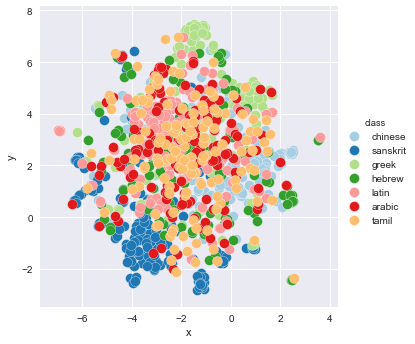

In [176]:
with sns.color_palette("Blues_d"):
    plt.figure(figsize=(12,12))
    sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = df,hue = "class"
             ,palette = 'Paired',size=5, plot_kws={"s": 100});
    plt.show()

<Figure size 864x864 with 0 Axes>

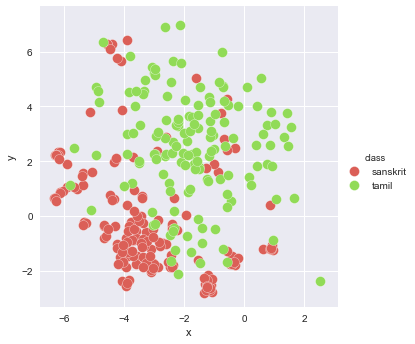

In [214]:
lan = ['sanskrit','tamil']
sans_tam = df[df['class'].isin(lan)]
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = sans_tam,hue = "class",size=5, plot_kws={"s": 100});
plt.show()

<Figure size 864x864 with 0 Axes>

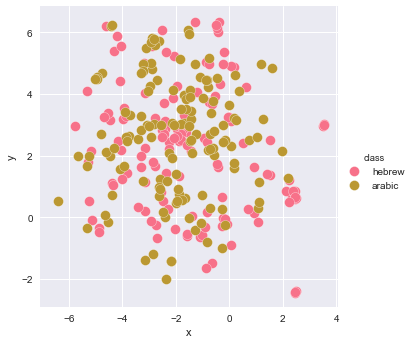

In [215]:
lan = ['arabic','hebrew']
dt = df[df['class'].isin(lan)]
with sns.color_palette("husl"):
    plt.figure(figsize=(12,12))
    sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = dt,hue = "class",size=5, plot_kws={"s": 100});
    plt.show()

<Figure size 864x864 with 0 Axes>

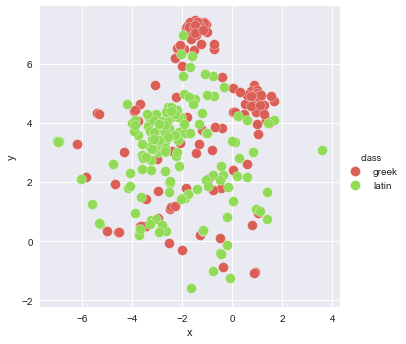

In [216]:
lan = ['greek','latin']
dt = df[df['class'].isin(lan)]
current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = dt,hue = "class",size=5, plot_kws={"s": 100});
plt.show()

<Figure size 864x864 with 0 Axes>

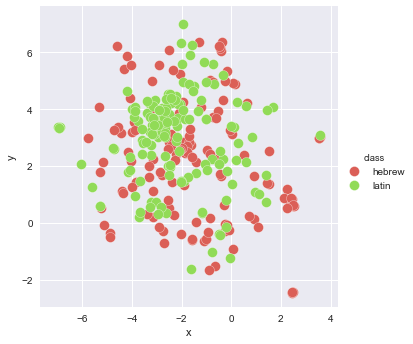

In [227]:
lan = ['latin','hebrew']
dt = df[df['class'].isin(lan)]
current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = dt,hue = "class",size=5, plot_kws={"s": 100});
plt.show()

<Figure size 864x864 with 0 Axes>

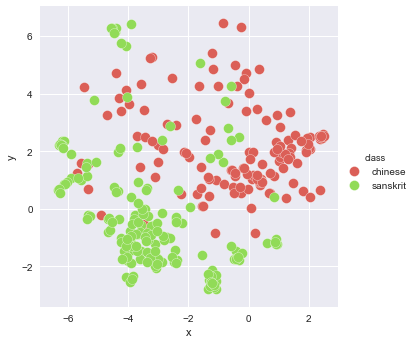

In [228]:
lan = ['chinese','sanskrit']
dt = df[df['class'].isin(lan)]
current_palette_4 = sns.color_palette("hls", 4)
sns.set_palette(current_palette_4)
plt.figure(figsize=(12,12))
sns.pairplot(x_vars = ["x"], y_vars = ["y"],data = dt,hue = "class",size=5, plot_kws={"s": 100});
plt.show()